In [1]:
import cv2 as cv
from matplotlib import pyplot as plt


In [2]:


image0 = cv.imread("datasets/dtu/Rectified/scan1_train/rect_001_0_r5000.png")
image0 = cv.cvtColor(image0,cv.COLOR_BGR2GRAY)

image1 = cv.imread("datasets/dtu/Rectified/scan1_train/rect_002_0_r5000.png")
image1 = cv.cvtColor(image1,cv.COLOR_BGR2GRAY)

In [3]:
sift = cv.SIFT.create()

keypoints0 = sift.detect(image0)
keypoints0,features0 = sift.compute(image0,keypoints0)

keypoints1 = sift.detect(image1)
keypoints1,features1 = sift.compute(image1,keypoints1)

In [4]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
matcher = cv.FlannBasedMatcher(index_params,search_params)

matches = matcher.knnMatch(features0,features1,k=2)

In [5]:

good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

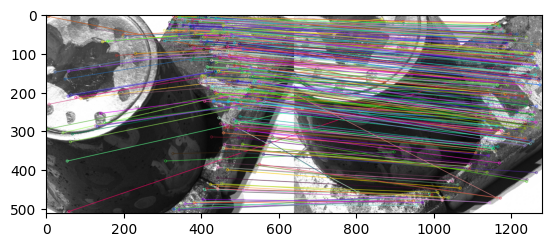

In [9]:
result = cv.drawMatches(image0,keypoints0,image1,keypoints1,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(result)

In [7]:
import numpy as np

In [8]:
def kabsch(P, Q):
  # 输入：两组点P和Q，每组点有n个
  # 输出：最优旋转矩阵R

  # 计算P和Q的质心p和q，并将P和Q平移到原点
  p = np.mean(P, axis=0)
  q = np.mean(Q, axis=0)
  P = P - p
  Q = Q - q

  # 计算P和Q的协方差矩阵H = P^T Q
  H = np.dot(P.T, Q)

  # 对H进行奇异值分解，得到H = U Σ V^T
  U, S, Vt = np.linalg.svd(H)

  # 计算修正因子d = sign(det(V U^T))
  d = np.sign(np.linalg.det(np.dot(Vt.T, U.T)))

  # 计算最优旋转矩阵R = V diag(1, 1, d) U^T
  R = np.dot(np.dot(Vt.T, np.diag([1, 1, d])), U.T)

  # 返回R
  return R
